# Create Synapse Files

In [1]:
import os
import json
from collections import Counter
from PIL import Image
import pandas as pd
from tqdm import tqdm
import pickle

import sys

In [2]:
base_dir = "/recsys_data/RecSys/fashion/polyvore-dataset/polyvore_outfits"
data_type = "nondisjoint" # "nondisjoint", "disjoint"
train_dir = os.path.join(base_dir, data_type)
image_dir = os.path.join(base_dir, "images")
embed_dir = "/recsys_data/RecSys/fashion/polyvore-dataset/precomputed"
train_json = "train.json"
valid_json = "valid.json"
test_json = "test.json"

train_file = "compatibility_train.txt"
valid_file = "compatibility_valid.txt"
test_file = "compatibility_test.txt"
item_file = "polyvore_item_metadata.json"
outfit_file = "polyvore_outfit_titles.json"

In [3]:
with open(os.path.join(train_dir, train_json), 'r') as fr:
    train_pos = json.load(fr)
    
with open(os.path.join(train_dir, valid_json), 'r') as fr:
    valid_pos = json.load(fr)
    
with open(os.path.join(train_dir, test_json), 'r') as fr:
    test_pos = json.load(fr)
    
with open(os.path.join(base_dir, item_file), 'r') as fr:
    pv_items = json.load(fr)
    
with open(os.path.join(base_dir, outfit_file), 'r') as fr:
    pv_outfits = json.load(fr)
print(f"Total {len(train_pos)}, {len(valid_pos)}, {len(test_pos)} outfits in train, validation and test split, respectively")

Total 53306, 5000, 10000 outfits in train, validation and test split, respectively


In [4]:
with open(os.path.join(train_dir, train_file), 'r') as fr:
    train_X, train_y = [], []
    for line in fr:
        elems = line.strip().split()
        train_y.append(elems[0])
        train_X.append(elems[1:])

with open(os.path.join(train_dir, valid_file), 'r') as fr:
    valid_X, valid_y = [], []
    for line in fr:
        elems = line.strip().split()
        valid_y.append(elems[0])
        valid_X.append(elems[1:])

with open(os.path.join(train_dir, test_file), 'r') as fr:
    test_X, test_y = [], []
    for line in fr:
        elems = line.strip().split()
        test_y.append(elems[0])
        test_X.append(elems[1:])

print(f"Total {len(train_X)}, {len(valid_X)}, {len(test_X)} examples in train, validation and test split, respectively")

Total 106612, 10000, 20000 examples in train, validation and test split, respectively


In [5]:
item_dict = {}
for ii, outfit in enumerate(train_pos):
    items = outfit['items']
    mapped = train_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

for ii, outfit in enumerate(valid_pos):
    items = outfit['items']
    mapped = valid_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

for ii, outfit in enumerate(test_pos):
    items = outfit['items']
    mapped = test_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

284767
311548
365054


In [10]:
new_train_file = "compatibility_train_renamed.txt"
new_valid_file = "compatibility_valid_renamed.txt"
new_test_file = "compatibility_test_renamed.txt"

with open(os.path.join(train_dir, new_train_file), 'w') as fw:
    for x, y in zip(train_X, train_y):
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")

with open(os.path.join(train_dir, new_valid_file), 'w') as fw:
    for x, y in zip(valid_X, valid_y):
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")

with open(os.path.join(train_dir, new_test_file), 'w') as fw:
    for x, y in zip(test_X, test_y):
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")


In [11]:
image_embedding_file = os.path.join(embed_dir, "effnet_tuned_polyvore.pkl")

with open(image_embedding_file, "rb") as fr:
    image_embedding_dict = pickle.load(fr)
print(f"Loaded {len(image_embedding_dict)} image embeddings")

Loaded 261057 image embeddings


In [13]:
small_dict = {}
count = 0
for image in image_embedding_dict:
    small_dict[image] = image_embedding_dict[image]
    count += 1
    if count > 10:
        break

with open(os.path.join(embed_dir, "small_image_dict.pkl"), "wb") as output_file:
    pickle.dump(small_dict, output_file)

In [14]:
small_dict

{'114082981': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([-0.04131459, -0.03822539, -0.11315762, ..., -0.05389776,
        -0.09421513, -0.07536255], dtype=float32)>,
 '200162527': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([ 1.4164206e+00,  6.8301838e-03, -2.1706795e-04, ...,
        -6.6406071e-02,  3.9901610e-02,  5.5101466e-01], dtype=float32)>,
 '129089366': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([ 0.03774948,  0.02974486, -0.01352629, ...,  0.18308279,
        -0.1321953 , -0.05086534], dtype=float32)>,
 '206910887': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([ 0.0759145 , -0.02402982,  0.00596189, ...,  0.06850755,
         0.63392633,  0.19167559], dtype=float32)>,
 '191335829': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([ 0.2983623 , -0.09408159, -0.04841552, ..., -0.05707994,
        -0.03165482,  0.1299014 ], dtype=float32)>,
 '181327897': <tf.Tensor: shape=(1280,), dtype=float32, numpy=
 array([-0.04763994

In [15]:
len(set(item_dict.values()))

251008

In [16]:
text_embedding_file = os.path.join(embed_dir, "bert_polyvore.pkl")
with open(text_embedding_file, "rb") as fr:
    text_embedding_dict = pickle.load(fr)
print(f"Loaded {len(text_embedding_dict)} text embeddings")

Loaded 251008 text embeddings


In [18]:
with open(os.path.join(embed_dir, "bert_polyvore.txt"), "w") as fw:
    for item in tqdm(text_embedding_dict):
        vec = text_embedding_dict[item]
        vec = " ".join([str(x) for x in vec])
        out = item + "\t" + vec + "\n"
        fw.write(out)

100%|██████████| 251008/251008 [02:17<00:00, 1823.30it/s]


In [19]:
with open(os.path.join(embed_dir, "effnet_tuned_polyvore.txt"), "w") as fw:
    for item in tqdm(image_embedding_dict):
        vec = image_embedding_dict[item].numpy()
        vec = " ".join([str(x) for x in vec])
        out = item + "\t" + vec + "\n"
        fw.write(out)

100%|██████████| 261057/261057 [04:17<00:00, 1012.77it/s]


/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


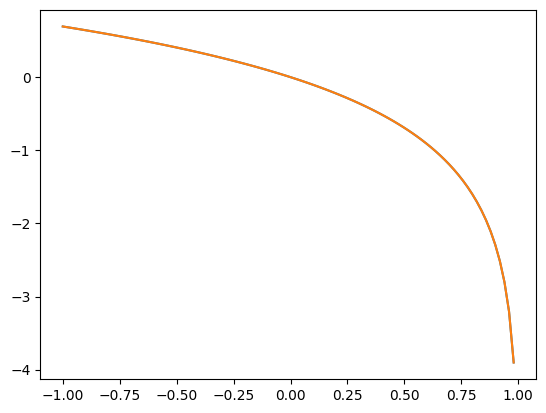

In [26]:
import math
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = np.log(1-x)
plt.plot(x,y)
plt.show()

## Create Small Samples (for AzureML)

In [1]:
import os
import json
from collections import Counter
from PIL import Image
import pandas as pd
from tqdm import tqdm
import pickle

import sys

In [2]:
base_dir = "/recsys_data/RecSys/fashion/polyvore-dataset/polyvore_outfits"
data_type = "nondisjoint" # "nondisjoint", "disjoint"
train_dir = os.path.join(base_dir, data_type)
image_dir = os.path.join(base_dir, "images")
embed_dir = "/recsys_data/RecSys/fashion/polyvore-dataset/precomputed"
train_json = "train.json"
valid_json = "valid.json"
test_json = "test.json"

train_file = "compatibility_train.txt"
valid_file = "compatibility_valid.txt"
test_file = "compatibility_test.txt"
item_file = "polyvore_item_metadata.json"
outfit_file = "polyvore_outfit_titles.json"
n_item = 100

In [3]:
with open(os.path.join(train_dir, train_json), 'r') as fr:
    train_pos = json.load(fr)
    
with open(os.path.join(train_dir, valid_json), 'r') as fr:
    valid_pos = json.load(fr)
    
with open(os.path.join(train_dir, test_json), 'r') as fr:
    test_pos = json.load(fr)
    
with open(os.path.join(base_dir, item_file), 'r') as fr:
    pv_items = json.load(fr)
    
with open(os.path.join(base_dir, outfit_file), 'r') as fr:
    pv_outfits = json.load(fr)
print(f"Total {len(train_pos)}, {len(valid_pos)}, {len(test_pos)} outfits in train, validation and test split, respectively")

Total 53306, 5000, 10000 outfits in train, validation and test split, respectively


In [4]:
with open(os.path.join(train_dir, train_file), 'r') as fr:
    train_X, train_y = [], []
    for line in fr:
        elems = line.strip().split()
        train_y.append(elems[0])
        train_X.append(elems[1:])

with open(os.path.join(train_dir, valid_file), 'r') as fr:
    valid_X, valid_y = [], []
    for line in fr:
        elems = line.strip().split()
        valid_y.append(elems[0])
        valid_X.append(elems[1:])

with open(os.path.join(train_dir, test_file), 'r') as fr:
    test_X, test_y = [], []
    for line in fr:
        elems = line.strip().split()
        test_y.append(elems[0])
        test_X.append(elems[1:])

print(f"Total {len(train_X)}, {len(valid_X)}, {len(test_X)} examples in train, validation and test split, respectively")

Total 106612, 10000, 20000 examples in train, validation and test split, respectively


In [5]:
item_dict = {}
for ii, outfit in enumerate(train_pos):
    items = outfit['items']
    mapped = train_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

for ii, outfit in enumerate(valid_pos):
    items = outfit['items']
    mapped = valid_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

for ii, outfit in enumerate(test_pos):
    items = outfit['items']
    mapped = test_X[ii]
    item_dict.update({jj:kk['item_id'] for jj, kk in zip(mapped, items)})
print(len(item_dict))

284767
311548
365054


In [8]:
new_train_file = "compatibility_train_small.txt"
new_valid_file = "compatibility_valid_small.txt"
new_test_file = "compatibility_test_small.txt"
items_kept = set()

count = 0
with open(os.path.join(train_dir, new_train_file), 'w') as fw:
    for x, y in zip(train_X, train_y):
        items_kept |= set([item_dict[xi] for xi in x])
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")
        count += 1
        if count > n_item:
            break
print(f"Total {len(items_kept)} items in the train data")
            
count = 0
with open(os.path.join(train_dir, new_valid_file), 'w') as fw:
    for x, y in zip(valid_X, valid_y):
        items_kept |= set([item_dict[xi] for xi in x])
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")
        count += 1
        if count > n_item:
            break
print(f"Total {len(items_kept)} items ...")

count = 0
with open(os.path.join(train_dir, new_test_file), 'w') as fw:
    for x, y in zip(test_X, test_y):
        items_kept |= set([item_dict[xi] for xi in x])
        x_ = " ".join([item_dict[xi] for xi in x])
        fw.write("\t".join([x_, str(y)]) + "\n")
        count += 1
        if count > n_item:
            break
print(f"Total {len(items_kept)} items ...")


Total 535 items in the train data
Total 1094 items ...
Total 1611 items ...


In [10]:
text_embedding_file = os.path.join(embed_dir, "bert_polyvore.pkl")
with open(text_embedding_file, "rb") as fr:
    text_embedding_dict = pickle.load(fr)
print(f"Loaded {len(text_embedding_dict)} text embeddings")

new_text_embedding_file = os.path.join(embed_dir, "bert_polyvore_small.pkl")
new_text_dict = {}
for item in items_kept:
    new_text_dict[item] = text_embedding_dict[item]
    
with open(new_text_embedding_file, 'wb') as fw:
    pickle.dump(new_text_dict, fw)

Loaded 251008 text embeddings


In [11]:
image_embedding_file = os.path.join(embed_dir, "effnet_tuned_polyvore.pkl")

with open(image_embedding_file, "rb") as fr:
    image_embedding_dict = pickle.load(fr)
print(f"Loaded {len(image_embedding_dict)} image embeddings")

new_image_embedding_file = os.path.join(embed_dir, "effnet_tuned_polyvore_small.pkl")
new_image_dict = {}
for item in items_kept:
    new_image_dict[item] = image_embedding_dict[item]
    
with open(new_image_embedding_file, 'wb') as fw:
    pickle.dump(new_image_dict, fw)

Loaded 261057 image embeddings
